# Import & Clean Dataset

In [ ]:
import pandas as pd
dataset = pd.read_csv('Amazon.csv')
dataset.head()

In [91]:
# check for null values
dataset.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [92]:
# check for duplicate values
dataset.duplicated().sum()

0

In [93]:
# convert the rating_count from string to float
dataset['rating_count'] = dataset['rating_count'].str.replace(',', '')
dataset['rating_count'] = dataset['rating_count'].astype(float)
# Filling in missing data for rating_count
dataset['rating_count'].fillna(dataset['rating_count'].median(), inplace=True)
dataset['rating_count'].isnull().sum()

0

In [ ]:
# Remove rows with non-numeric ratings
dataset = dataset[dataset['rating'].str.isnumeric()]

# convert the rating from string to float
dataset['rating'] = dataset['rating'].astype(float)

In [ ]:
# separate the currency sign from the discounted_price and actual_price and convert them to float
dataset['discounted_price'] = dataset['discounted_price'].str.replace('₹', '')
dataset['discounted_price'] = dataset['discounted_price'].str.replace(',', '')
dataset['discounted_price'] = dataset['discounted_price'].astype(float)
dataset['actual_price'] = dataset['actual_price'].str.replace('₹', '')
dataset['actual_price'] = dataset['actual_price'].str.replace(',', '')
dataset['actual_price'] = dataset['actual_price'].astype(float)
# put the ₹ currency in a new column
dataset['currency'] = '₹'
dataset.head()

In [ ]:
# for the category column, remove all the strings after the | symbol
dataset['category'] = dataset['category'].str.split('|').str[0]
dataset.head()

*New csv file with cleaned data*

In [ ]:
# create a new csv file with the cleaned data
dataset.to_csv('Amazon_cleaned.csv', index=False)

**1. Investigate the structure and shape of your dataset.**



*   Structure of Dataset


In [ ]:
info = dataset.info()
print(info)



*   Data Shape (Rows & Columns)


In [ ]:
shape = dataset.shape
print("Rows:", shape[0])
print("Columns:", shape[1])

**2. Explore the variables that the dataset has. How are they distributed?**


*   Data Types



In [ ]:
types = dataset.dtypes
print(types)

* Using describe() function to print the summary statistics to check data distribution

In [ ]:
summary = dataset.describe()

print(summary)


**3. Compute the mean, sum, range, and other interesting statistics for numeric
columns.**

In [ ]:
numeric_columns = dataset.select_dtypes(include=['float64'])

mean = numeric_columns.mean()
sum = numeric_columns.sum()
range = numeric_columns.max() - numeric_columns.min()

print("Mean Values of Columns: ")
print(mean)

print("\nSum Values of Columns: ")
print(sum)

print("\nRange of Columns: ")
print(range)

**4. Explore distributions of numeric columns using histograms etc.**


Histogram 1 - Discounted Price Distribution

*   Column: 'discounted_price'



In [ ]:
import matplotlib.pyplot as plt

plt.hist(dataset['discounted_price'])
plt.title("Discounted Price Distribution")
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

Histogram 2 - Actual Price Distribution

*   Column: 'actual_price'



In [ ]:
plt.hist(dataset['actual_price'])
plt.title("Actual Price Distribution")
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

Histogram 3 - Rating Count Distribution

*   Column: 'rating_count'



In [ ]:
plt.hist(dataset['rating_count'])
plt.title("Rating Count Distribution")
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

Bar Chart 1 - Rating Count per Category

In [ ]:
categories = dataset['category'].unique()
# add rating count  on the category to a list
rating_count = []
for category in categories:
    rating_count.append(dataset[dataset['category'] == category]['rating_count'].sum())
# plot the bar graph
plt.bar(categories, rating_count)
plt.title("Rating Count per Category")
plt.xlabel('Category')
plt.ylabel('Rating Count')
plt.xticks(rotation=90)
plt.figure(figsize=(8,5))

plt.show()

# print the rating count for each category based on the dataset
print("Rating Count per Category: ")
print(rating_count)


Bar Chart 2 - Category Popularity Based on Rating Counts

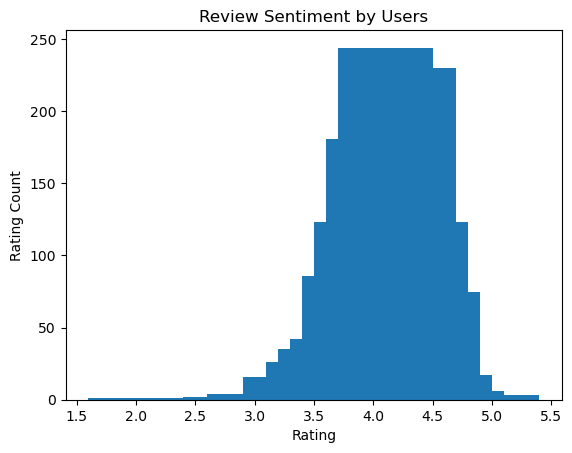

<Figure size 800x500 with 0 Axes>

In [107]:
# append ratings to a list
ratings = []
for category in categories:
    ratings.append(dataset[dataset['category'] == category]['rating'].sum())
    
# round off the ratings to nearest integer
ratings = [round(rating) for rating in ratings]
# count the number of ratings from 1 to 5
rating_count = [ratings.count(1), ratings.count(2), ratings.count(3), ratings.count(4), ratings.count(5)]
print("Rating Count: ")
print(rating_count)
# plot the bar graph
plt.bar([1,2,3,4,5], rating_count)
plt.title("Category Popularity Based on Rating Counts")
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.figure(figsize=(8,5))

plt.show()



Scatter Plot 1 - Product Popularity by Rating and Rating Count

In [89]:
plt.title("Product Popularity by Rating and Rating Count")
plt.xlabel('Rating')
plt.ylabel('Rating Count')

plt.scatter(dataset['rating'],dataset['rating_count'])
plt.show()

Scatter Plot 2 - Discount Percentage vs. Rating

In [ ]:
plt.scatter(dataset['discount_percentage'], dataset['rating'], alpha=0.5)  # Alpha controls the transparency of points
plt.title("Discount Percentage vs. Rating")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
tick_positions = [10, 20, 30, 40, 50, 60, 70]
tick_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%']
plt.xticks(tick_positions, tick_labels)


plt.show()